#Wine Classifier
Wine Classifier uses a scikit-learn dataset to create three different classifier models (Random Tree, Support Vector, and Ensemble) that each identify types of wine with varying accuracy to create the most optimized classification model. The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

##Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import seaborn as sns
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

##1) Introductory questions
**Which data set did you use?**<br>
I used scikit-learn's wine recognition dataset obtained [here](https://scikit-learn.org/stable/datasets/toy_dataset.html).

**What problem will you solve?**<br>
This prediction model will utilize data gathered from the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators and classify them into three different classes.

**What are the features and what is the target in your dataset?**<br>
The **features** include
* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

The **target** classes in the dataset are unspecified and will be refered to as
* class_0
* class_1
* class_2

##2) Baseline Decision Tree model
The baseline classification model which will showcase the base processes that the future models will utilize in classifying the wines.

In [2]:
# Imports the wine dataset from scikit-learn and seperates them into training and testing sets
from sklearn.datasets import load_wine

data = load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Outputs the dataset's target class names
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [4]:
# Uses cross referencing to create the best possible Decision Tree Classifier
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = DecisionTreeClassifier(random_state=42)

param_grid = {'min_samples_leaf': [2, 4, 6, 8, 10],
               'max_features': [2, 4, 6, 8, 10]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(X_train_scaled, y_train)
print(grid.best_params_)

CPU times: user 193 ms, sys: 136 µs, total: 193 ms
Wall time: 195 ms
{'max_features': 6, 'min_samples_leaf': 2}


In [5]:
# result of tuning the hyperparameters via cross-validation
best_model = grid.best_estimator_
X_test_scaled = scaler.fit_transform(X_test)
yfit = best_model.predict(X_test_scaled)

In [6]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit,
                            target_names=data.target_names))

              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       0.86      0.86      0.86        14
     class_2       0.71      0.62      0.67         8

    accuracy                           0.86        36
   macro avg       0.83      0.83      0.83        36
weighted avg       0.86      0.86      0.86        36



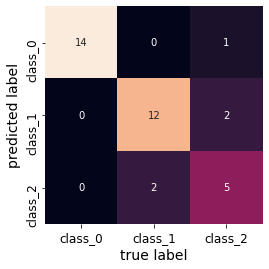

In [7]:
# confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

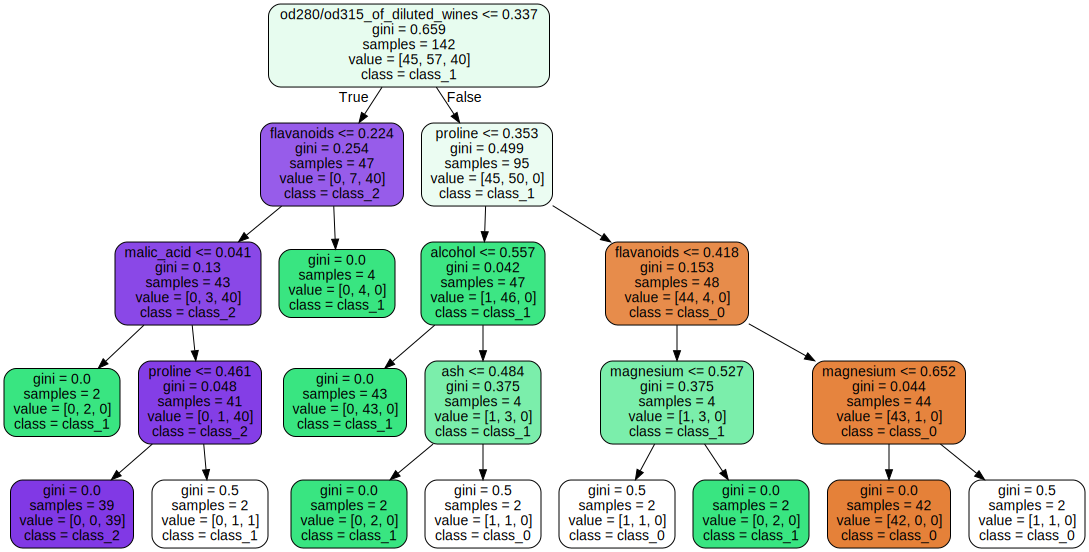

In [8]:
# A visual Decision Tree Model
from graphviz import Source
from sklearn.tree import export_graphviz
export_graphviz(
        best_model,
        out_file="classifier_tree.dot",
        feature_names=data.feature_names,
        class_names=data.target_names,
        rounded=True,
        filled=True
    )
Source.from_file("classifier_tree.dot")

###2.1) Conclusions
*   Best model utilizes {'max_features': 6, 'min_samples_leaf': 2}
*   Accuracy of model: 0.86
*   Precision* of model: 0.93(class_0), 0.86(class_1), 0.71(class_2)
*   Recall** of model: 1.00(class_0), 0.86(class_1), 0.62(class_2)

According to our classification report, our model has an 86% accuracy which is alright.  The confusion matrix tells us that our model could correctly predict 14 out of 14 wines in class_0, 12 out of 14 wines in class_1, and 5 out of 8 wines in class_2.<br>

\*Percentage of correct guesses out of total guesses made onto that target class</br>
\**Percentage of correct guesses out of total elements in that target class

##3) Random Forest model
Random Forest models operates by constructing a multitude of decision trees at training time. For these classification tasks, the output of the random forest is the class selected by most trees.

In [9]:
# same setup as the previous model
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

forest_model = RandomForestClassifier(random_state=42)

param_grid = {'min_samples_leaf': [2, 4, 6, 8, 10],
               'max_features': [2, 4, 6, 8, 10]}
forest_grid = GridSearchCV(forest_model, param_grid)
%time forest_grid.fit(X_train_scaled, y_train)
print(forest_grid.best_params_)

CPU times: user 17.9 s, sys: 155 ms, total: 18.1 s
Wall time: 18 s
{'max_features': 2, 'min_samples_leaf': 2}


In [11]:
# result of tuning the hyperparameters via cross-validation
best_forest_model = forest_grid.best_estimator_
X_test_scaled = scaler.fit_transform(X_test)
yfit = best_forest_model.predict(X_test_scaled)

In [12]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit,
                            target_names=data.target_names))

              precision    recall  f1-score   support

     class_0       1.00      0.96      0.98        26
     class_1       0.90      1.00      0.95        27
     class_2       1.00      0.89      0.94        19

    accuracy                           0.96        72
   macro avg       0.97      0.95      0.96        72
weighted avg       0.96      0.96      0.96        72



###3.1) Conclusions
*   Best model utilizes {'max_features': 2, 'min_samples_leaf': 2}
*   Accuracy of model: 0.96
*   Precision* of model: 1.00(class_0), 0.90(class_1), 1.00(class_2)
*   Recall** of model: 0.96(class_0), 1.00(class_1), 0.89(class_2)

According to our classification report, our model has an 96% accuracy which is significantly better than our previous model.  There was a huge difference between this model and the prevous model in precision (1.00, 0.90, 1.00 vs 0.93, 0.86, 0.71) and recall scores (0.96, 1.00, 0.89 vs 1.00, 0.86, 0.62) across the board.<br>

\*Percentage of correct guesses out of total guesses made onto that target class</br>
\**Percentage of correct guesses out of total elements in that target class

##4) Support Vector Machines (SVM) model
SVMs are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis and are one of the most robust prediction methods, being based on statistical learning frameworks.

In [13]:
# same setup as the previous model
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [14]:
from sklearn.svm import SVC
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

svm_model = SVC(kernel='rbf')

param_grid = {'C': [1, 5, 10, 50, 100],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]}
svm_grid = GridSearchCV(svm_model, param_grid)
%time svm_grid.fit(X_train_scaled, y_train)
print(svm_grid.best_params_)

CPU times: user 203 ms, sys: 961 µs, total: 204 ms
Wall time: 207 ms
{'C': 50, 'gamma': 0.01}


In [15]:
# result of tuning the hyperparameters via cross-validation
best_svm_model = svm_grid.best_estimator_
X_test_scaled = scaler.fit_transform(X_test)
yfit = best_svm_model.predict(X_test_scaled)

In [16]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit,
                            target_names=data.target_names))

              precision    recall  f1-score   support

     class_0       0.96      1.00      0.98        26
     class_1       1.00      0.96      0.98        27
     class_2       1.00      1.00      1.00        19

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



###4.1) Conclusions
*   Best model utilizes {'C': 50, 'gamma': 0.01}
*   Accuracy of model: 0.99
*   Precision* of model: 0.96(class_0), 1.00(class_1), 1.00(class_2)
*   Recall** of model: 1.00(class_0), 0.96(class_1), 1.00(class_2)

According to our classification report, our model has an almost perfect 99% accuracy which outperformed our previous Random Forest model.  Our findings tells us that out of our large test dataset, the SVM model only misclassified one or two class_1 wine entries as a class_0 wine.<br>

\*Percentage of correct guesses out of total guesses made onto that target class</br>
\**Percentage of correct guesses out of total elements in that target class

##5) Ensemble model using VotingClassifer
A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.

In [20]:
# same setup as the previous model
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

from sklearn.svm import SVC
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [21]:
from sklearn.ensemble import VotingClassifier

best_voting_model = VotingClassifier(estimators=[('rf', best_forest_model), ('svc', best_svm_model)], voting='hard')

In [22]:
best_voting_model.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=2,
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=2,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
             

In [23]:
from sklearn.metrics import accuracy_score

for model in (best_forest_model, best_svm_model, best_voting_model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(model.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9583333333333334
SVC 0.9861111111111112
VotingClassifier 0.9583333333333334


###5.1) Conclusions
The Ensemble model suprisingly performed the same as the RF model with an accuracy rating of ~96% while the SVC model performed the highest with ~99% accuracy.

##6) Compare the results from all the models

**Accuracy Ratings**
*   Baseline Decision Tree model: 86%
*   Random Forest model: 96%
*   Support Vector Machine model: 99%
*   Ensemble model using VotingClassifier: 96%

Suprisingly, the Ensemble model did not outperform the SVM model and only tied with the Random Forest model when classifying scikit-learn's wine dataset.  The SVM had the highest accuracy rating on our test data with a near flawless 99% accuracy.